In [10]:
# !pip install ads
!pip i

     |████████████████████████████████| 41 kB 726 kB/s  eta 0:00:01
  Created wheel for ads: filename=ads-0.12.3-py3-none-any.whl size=37392 sha256=be854a38e39f57ab50e07814dd47cb62b5f8f79280c888e962f7dc016591807f
  Stored in directory: /home/datascience/.cache/pip/wheels/51/e5/d7/fc02f5110d624a2dee05bfed0ad48418b26ce8f0d15d2c1629
  Created wheel for httpretty: filename=httpretty-0.8.10-py3-none-any.whl size=24000 sha256=e0bc8593ecf8e262a1f09cbf0dda492cc375a4615645ff2307d98dd19031faf2
  Stored in directory: /home/datascience/.cache/pip/wheels/9a/1c/14/92b60cd98245f8df27555f05204c02c591fd42a46a09af32be
Successfully built ads httpretty


In [3]:
import os

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None, 'display.max_rows', 100)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

from sklearn.preprocessing import StandardScaler
from scipy import stats

import random
import time
from datetime import datetime

import warnings
# warnings.filterwarnings('ignore')

# import ads
# from ads.dataset.factory import DatasetFactory
# ads.set_auth(auth = 'resource_principal')
# bucket_name = 'Formular1_data'
# file_name = 'lrrmztrksjnl'
# namespace = 'weather.csv'
# storage_options = {'config': {'tenancy': os.environ['TENANCY_OCID'],'region': os.environ['NB_REGION']}}
# ds = DatasetFactory.open(f'oci://{bucket_name}@{namespace}/{file_name}', storage_options = storage_options, format = 'csv')

In [4]:
# Reading the CSV file.
df = pd.read_csv('weather.csv')

/home/datascience/conda/generalmachinelearningforcpusonpython3_7vyes/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## A First Peep

In [102]:
df.drop('Unnamed: 58', axis = 1, inplace = True)
# df['TIMESTAMP'] = df['TIMESTAMP'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format= '%Y-%m-%d %H:%M:%S', errors= 'coerce')
df.tail(30)

M_PACKET_FORMAT  M_GAME_MAJOR_VERSION  M_GAME_MINOR_VERSION  \
3572298             2021                     1                    14   
3572299             2021                     1                    14   
3572300             2021                     1                    14   
3572301             2021                     1                    14   
3572302             2021                     1                    14   
3572303             2021                     1                    14   
3572304             2021                     1                    14   
3572305             2021                     1                    14   
3572306             2021                     1                    14   
3572307             2021                     1                    14   
3572308             2021                     1                    14   
3572309             2021                     1                    14   
3572310             2021                     1                    14   
3572311             2021                     1                    14   
3572312             2021                     1                    14   
3572313             2021                     1                    14   
3572314             2021                     1                    14   
3572315             2021                     1                    14   
3572316             2021                     1                    14   
3572317             2021                     1                    14   
3572318             2021                     1                    14   
3572319             2021                     1                    14   
3572320             2021                     1                    14   
3572321             2021                     1                    14   
3572322             2021                     1                    14   
3572323             2021                     1                    14   
3572324             2021                     1                    14   
3572325             2021                     1                    14   
3572326             2021                     1                    14   
3572327             2021                     1                    14   

         M_PACKET_VERSION  M_PACKET_ID  M_SESSION_UID  M_SESSION_TIME  \
3572298                 1            1   1.086282e+19         683.047   
3572299                 1            1   1.086282e+19         683.047   
3572300                 1            1   1.086282e+19         683.047   
3572301                 1            1   1.086282e+19         683.047   
3572302                 1            1   1.086282e+19         683.047   
3572303                 1            1   1.086282e+19         683.047   
3572304                 1            1   1.086282e+19         683.047   
3572305                 1            1   1.086282e+19         683.047   
3572306                 1            1   1.086282e+19         683.047   
3572307                 1            1   1.086282e+19         683.047   
3572308                 1            1   1.086282e+19         683.047   
3572309                 1            1   1.086282e+19         683.047   
3572310                 1            1   1.086282e+19         683.047   
3572311                 1            1   1.086282e+19         683.047   
3572312                 1            1   1.086282e+19         683.047   
3572313                 1            1   1.086282e+19         683.047   
3572314                 1            1   1.086282e+19         683.047   
3572315                 1            1   1.086282e+19         683.047   
3572316                 1            1   1.086282e+19         683.047   
3572317                 1            1   1.086282e+19         683.047   
3572318                 1            1   1.086282e+19         683.047   
3572319                 1            1   1.086282e+19         683.047   
3572320                 1            1   1.086282e+19         683.047   
3572321                 

The columns for WEEKEND_LINK_IDENTIFIER, SEASON_LINK_IDENTIFIER and SESSION_LINK_IDENTIFIER are same, Well make better decision from correlation plot

In [103]:
print(df.shape)
df.describe()

(3572328, 58)


M_PACKET_FORMAT  M_GAME_MAJOR_VERSION  M_GAME_MINOR_VERSION  \
count        3572328.0             3572328.0          3.572328e+06   
mean            2021.0                   1.0          1.410704e+01   
std                0.0                   0.0          3.091641e-01   
min             2021.0                   1.0          1.400000e+01   
25%             2021.0                   1.0          1.400000e+01   
50%             2021.0                   1.0          1.400000e+01   
75%             2021.0                   1.0          1.400000e+01   
max             2021.0                   1.0          1.500000e+01   

       M_PACKET_VERSION  M_PACKET_ID  M_SESSION_UID  M_SESSION_TIME  \
count         3572328.0    3572328.0   3.572328e+06    3.572328e+06   
mean                1.0          1.0   8.239394e+18    1.019926e+03   
std                 0.0          0.0   5.119260e+18    1.682487e+03   
min                 1.0          1.0   2.106082e+16    4.000000e-03   
25%                 1.0          1.0   3.591802e+18    1.138000e+02   
50%                 1.0          1.0   7.802116e+18    4.319240e+02   
75%                 1.0          1.0   1.279207e+19    1.024212e+03   
max                 1.0          1.0   1.826297e+19    9.686959e+03   

       M_FRAME_IDENTIFIER  M_PLAYER_CAR_INDEX  M_SECONDARY_PLAYER_CAR_INDEX  \
count        3.572328e+06        3.572328e+06                     3572328.0   
mean         2.857427e+04        9.212292e+00                         255.0   
std          5.428773e+04        9.217495e+00                           0.0   
min          0.000000e+00        0.000000e+00                         255.0   
25%          3.007000e+03        0.000000e+00                         255.0   
50%          1.174900e+04        2.000000e+00                         255.0   
75%          2.972400e+04        1.900000e+01                         255.0   
max          3.339170e+05        1.900000e+01                         255.0   

       M_BRAKING_ASSIST  M_SESSION_LINK_IDENTIFIER  M_PIT_RELEASE_ASSIST  \
count      3.572328e+06               3.572328e+06          3.572328e+06   
mean       6.926777e-01               1.894529e+09          3.153865e-01   
std        1.178056e+00               1.345200e+09          4.646697e-01   
min        0.000000e+00               0.000000e+00          0.000000e+00   
25%        0.000000e+00               8.613347e+08          0.000000e+00   
50%        0.000000e+00               2.184232e+09          0.000000e+00   
75%        2.000000e+00               3.271241e+09          1.000000e+00   
max        3.000000e+00               4.264309e+09          1.000000e+00   

        M_ZONE_START    M_ZONE_FLAG  M_PIT_STOP_WINDOW_IDEAL_LAP  \
count  974274.000000  974274.000000                 3.572328e+06   
mean        0.414565       0.009579                 1.881843e+00   
std         0.315565       0.147761                 8.317268e+00   
min         0.000000       0.000000                 0.000000e+00   
25%         0.108000       0.000000                 0.000000e+00   
50%         0.412000       0.000000                 0.000000e+00   
75%         0.690000       0.000000                 0.000000e+00   
max         0.997000       3.000000                 4.700000e+01   

       M_TRACK_TEMPERATURE  M_TRACK_LENGTH  M_GAME_PAUSED  \
count         3.572328e+06    3.572328e+06   3.572328e+06   
mean          3.185621e+01    4.890588e+03   1.366560e-02   
std           2.457039e+00    6.615081e+02   1.160985e-01   
min           2.300000e+01    3.323000e+03   0.000000e+00   
25%           3.100000e+01    4.650000e+03   0.000000e+00   
50%           3.300000e+01    4.650000e+03   0.000000e+00   
75%           3.300000e+01    5.408000e+03   0.000000e+00   
max           3.600000e+01    5.896000e+03   1.000000e+00   

       M_FORECAST_ACCURACY  M_AIR_TEMPERATURE  M_NUM_WEATHER_FORECAST_SAMPLES  \
count         3.572328e+06       3.572328e+06                    3.572328e+06   
mean          

In [88]:
df.describe(include='O')

GAMEHOST
count     524912
unique         2
top     f1digest
freq      508434

Seems we have some missing information, so lets see where and why?

In [104]:
df.isnull().sum()


M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

Seems the missing info are along similar rows and this might mean some relationship btw these features, also game host is a new feature, and while this might have significant implication on the weather pattern in the game, well create a new class unknown for it.

## Possible Hypothesis 


### Hypothesis 1: Model by timestamp changes within each sessionID

In [52]:
dd = df.groupby(['M_SESSION_UID', 'TIMESTAMP'])
dd.first()

M_PACKET_FORMAT  \
M_SESSION_UID TIMESTAMP                                        
2.256787e+17  1970-01-01 00:00:01.642373537             2021   
              1970-01-01 00:00:01.642373538             2021   
              1970-01-01 00:00:01.642373539             2021   
              1970-01-01 00:00:01.642373540             2021   
              1970-01-01 00:00:01.642373541             2021   
...                                                      ...   
1.798679e+19  1970-01-01 00:00:01.642373529             2021   
              1970-01-01 00:00:01.642373530             2021   
              1970-01-01 00:00:01.642373531             2021   
              1970-01-01 00:00:01.642373532             2021   
              1970-01-01 00:00:01.642373533             2021   

                                             M_GAME_MAJOR_VERSION  \
M_SESSION_UID TIMESTAMP                                             
2.256787e+17  1970-01-01 00:00:01.642373537                     1   
              1970-01-01 00:00:01.642373538                     1   
              1970-01-01 00:00:01.642373539                     1   
              1970-01-01 00:00:01.642373540                     1   
              1970-01-01 00:00:01.642373541                     1   
...                                                           ...   
1.798679e+19  1970-01-01 00:00:01.642373529                     1   
              1970-01-01 00:00:01.642373530                     1   
              1970-01-01 00:00:01.642373531                     1   
              1970-01-01 00:00:01.642373532                     1   
              1970-01-01 00:00:01.642373533                     1   

                                             M_GAME_MINOR_VERSION  \
M_SESSION_UID TIMESTAMP                                             
2.256787e+17  1970-01-01 00:00:01.642373537                    14   
              1970-01-01 00:00:01.642373538                    14   
              1970-01-01 00:00:01.642373539                    14   
              1970-01-01 00:00:01.642373540                    14   
              1970-01-01 00:00:01.642373541                    14   
...                                                           ...   
1.798679e+19  1970-01-01 00:00:01.642373529                    14   
              1970-01-01 00:00:01.642373530                    14   
              1970-01-01 00:00:01.642373531                    14   
              1970-01-01 00:00:01.642373532                    14   
              1970-01-01 00:00:01.642373533                    14   

                                             M_PACKET_VERSION  M_PACKET_ID  \
M_SESSION_UID TIMESTAMP                                                      
2.256787e+17  1970-01-01 00:00:01.642373537                 1            1   
              1970-01-01 00:00:01.642373538                 1            1   
              1970-01-01 00:00:01.642373539                 1            1   
              1970-01-01 00:00:01.642373540                 1            1   
              1970-01-01 00:00:01.642373541                 1            1   
...                                                       ...          ...   
1.798679e+19  1970-01-01 00:00:01.642373529                 1            1   
              1970-01-01 00:00:01.642373530                 1            1   
              1970-01-01 00:00:01.642373531                 1            1   
              1970-01-01 00:00:01.642373532                 1            1   
              1970-01-01 00:00:01.642373533                 1            1   

                                             M_SESSION_TIME  \
M_SESSION_UID TIMESTAMP                                       
2.256787e+17  1970-01-01 00:00:01.642373537           0.010   
              1970-01-01 00:00:01.642373538           0.524   
              1970-01-01 00:00:01.642373539           1.526   
              1970-01-01 00:00:01.642373540           2.525   
              1970-01-0

In [53]:
# Hypothesis 2
suid = df.M_SESSION_UID.value_counts()
suid
# We need a way to loop over the session

1.707009e+19    53438
3.734445e+18    41657
1.092928e+19    37345
7.399509e+18    33264
1.192738e+19    28721
2.148721e+18    23177
8.837777e+18    21795
1.332518e+19    19712
3.591802e+18    19712
1.300210e+19    19404
4.140339e+18    16478
1.075215e+19    12551
6.740665e+18    12320
6.970332e+18    12243
7.316983e+17    11858
1.385954e+19    10087
1.798679e+19     9856
2.773719e+18     9856
6.058150e+18     9856
2.375254e+18     9702
1.092459e+19     9702
1.172583e+19     9702
2.256787e+17     9625
7.802116e+18     9548
1.020819e+19     8778
2.939734e+18     8316
1.647800e+19     8008
1.776165e+19     7700
7.695537e+18     6776
3.688942e+18     6391
1.295874e+19     5775
1.497195e+19     5313
1.015498e+19     5236
7.338505e+18     4389
7.706849e+18     4235
1.602558e+19     3465
1.141088e+19     3465
6.206022e+18     3234
7.571059e+18     2926
8.577135e+18     2849
1.060700e+19     2772
8.183544e+18     2310
1.460469e+19     1925
3.899499e+18     1848
1.844402e+18     1848
4.611611e+

In [56]:
# dd.get_group()

### Hypothesis 2: Model by average feature in a timestamp

In [57]:
de=df.groupby('TIMESTAMP').mean()
print(de.shape)
de.tail()

(6733, 56)


M_PACKET_FORMAT  M_GAME_MAJOR_VERSION  \
TIMESTAMP                                                              
1970-01-01 00:00:01.643938994           2021.0                   1.0   
1970-01-01 00:00:01.643938995           2021.0                   1.0   
1970-01-01 00:00:01.643938996           2021.0                   1.0   
1970-01-01 00:00:01.643938997           2021.0                   1.0   
1970-01-01 00:00:01.643938998           2021.0                   1.0   

                               M_GAME_MINOR_VERSION  M_PACKET_VERSION  \
TIMESTAMP                                                               
1970-01-01 00:00:01.643938994                  15.0               1.0   
1970-01-01 00:00:01.643938995                  15.0               1.0   
1970-01-01 00:00:01.643938996                  15.0               1.0   
1970-01-01 00:00:01.643938997                  15.0               1.0   
1970-01-01 00:00:01.643938998                  15.0               1.0   

                               M_PACKET_ID  M_SESSION_UID  M_SESSION_TIME  \
TIMESTAMP                                                                   
1970-01-01 00:00:01.643938994          1.0   1.647800e+19         188.117   
1970-01-01 00:00:01.643938995          1.0   1.647800e+19         189.116   
1970-01-01 00:00:01.643938996          1.0   1.647800e+19         190.119   
1970-01-01 00:00:01.643938997          1.0   1.647800e+19         191.122   
1970-01-01 00:00:01.643938998          1.0   1.647800e+19         192.125   

                               M_FRAME_IDENTIFIER  M_PLAYER_CAR_INDEX  \
TIMESTAMP                                                               
1970-01-01 00:00:01.643938994              4814.0                 0.0   
1970-01-01 00:00:01.643938995              4835.0                 0.0   
1970-01-01 00:00:01.643938996              4856.0                 0.0   
1970-01-01 00:00:01.643938997              4878.0                 0.0   
1970-01-01 00:00:01.643938998              4900.0                 0.0   

                               M_SECONDARY_PLAYER_CAR_INDEX  M_BRAKING_ASSIST  \
TIMESTAMP                                                                       
1970-01-01 00:00:01.643938994                         255.0               0.0   
1970-01-01 00:00:01.643938995                         255.0               0.0   
1970-01-01 00:00:01.643938996                         255.0               0.0   
1970-01-01 00:00:01.643938997                         255.0               0.0   
1970-01-01 00:00:01.643938998                         255.0               0.0   

                               M_SESSION_LINK_IDENTIFIER  \
TIMESTAMP                                                  
1970-01-01 00:00:01.643938994                        0.0   
1970-01-01 00:00:01.643938995                        0.0   
1970-01-01 00:00:01.643938996                        0.0   
1970-01-01 00:00:01.643938997                        0.0   
1970-01-01 00:00:01.643938998                        0.0   

                               M_PIT_RELEASE_ASSIST  M_ZONE_START  \
TIMESTAMP                                                           
1970-01-01 00:00:01.643938994                   0.0      0.412476   
1970-01-01 00:00:01.643938995                   0.0      0.412476   
1970-01-01 00:00:01.643938996                   0.0      0.412476   
1970-01-01 00:00:01.643938997                   0.0      0.412476   
1970-01-01 00:00:01.643938998                   0.0      0.412476   

                               M_ZONE_FLAG  M_PIT_STOP_WINDOW_IDEAL_LAP  \
TIMESTAMP                                                                 
1970-01-01 00:00:01.643938994          0.0                          0.0   
1970-01-01 00:00:01.643938995          0.0                          0.0   
1970-01-01 00:00:01.643938996          0.0                          0.0   
1970-01-01 00:00:01.643938997          0.0                          0.0   
1970-01-01 00:00:01.643938998          

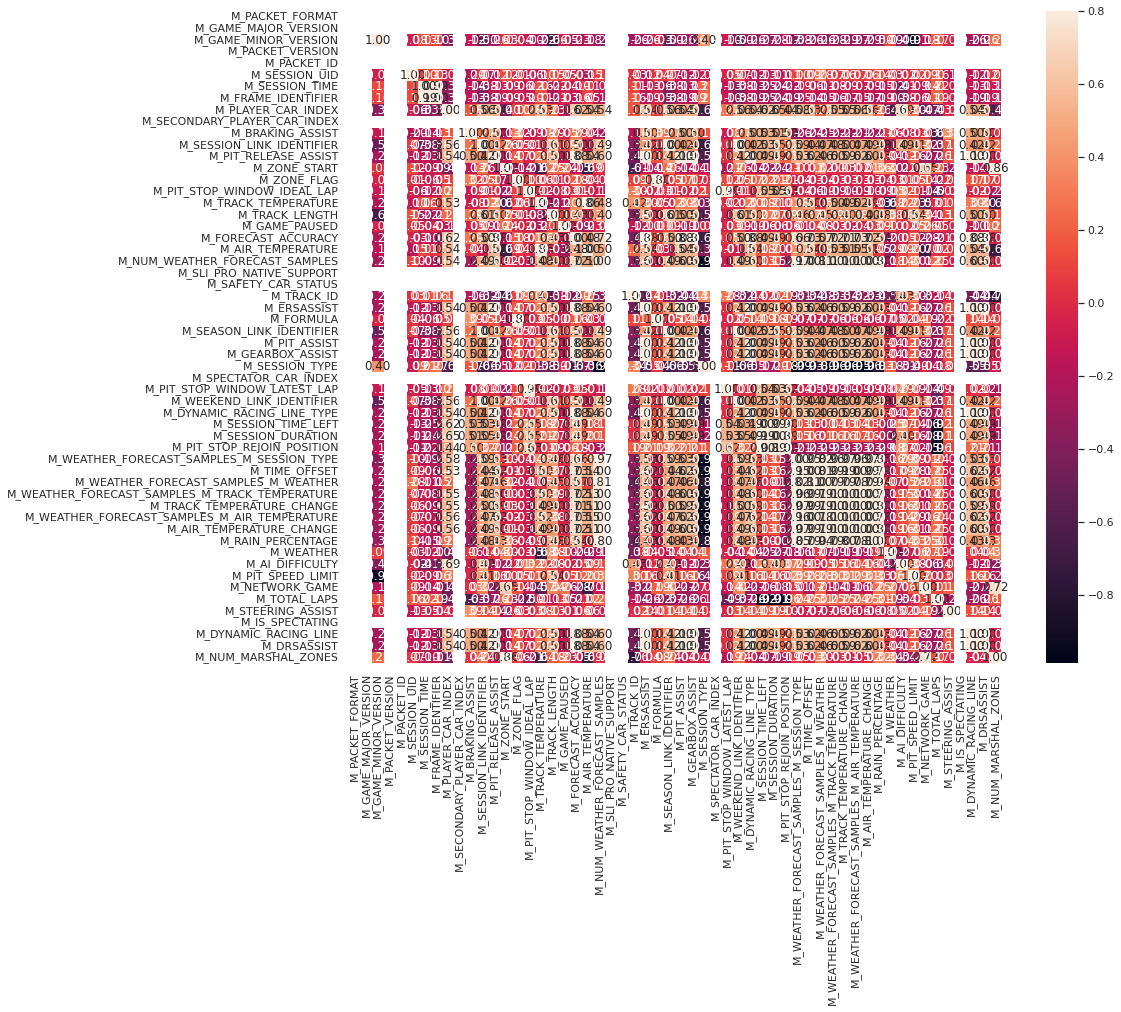

In [58]:
corrmat = de.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');


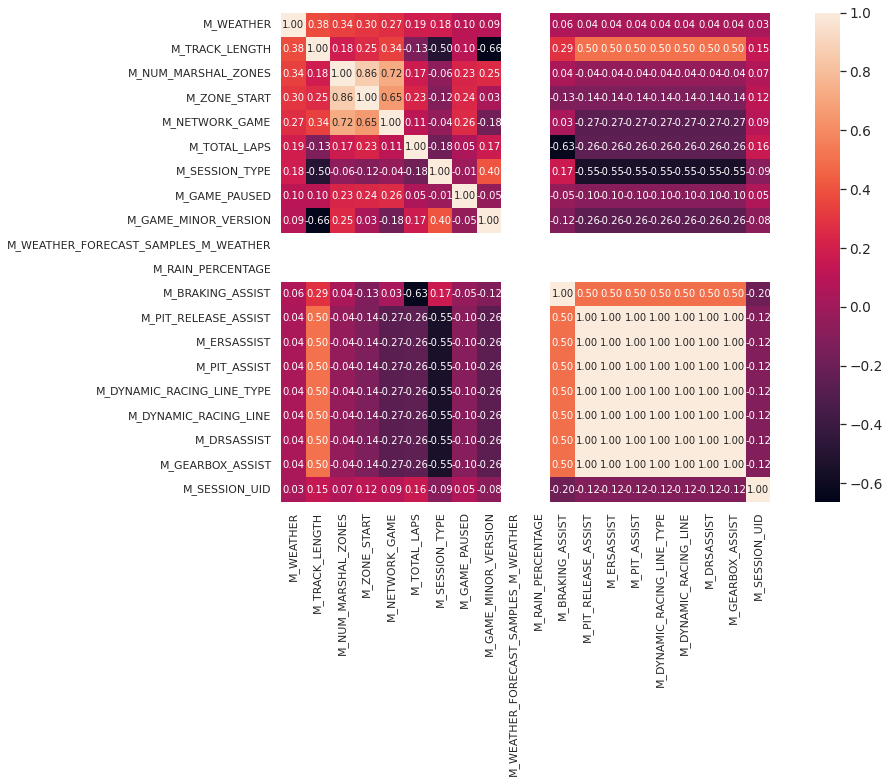

In [59]:
f, ax = plt.subplots(figsize=(16, 9))
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(de[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [117]:
df.isnull().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

In [61]:
de.isnull().sum()

M_PACKET_FORMAT                                   0
M_GAME_MAJOR_VERSION                              0
M_GAME_MINOR_VERSION                              0
M_PACKET_VERSION                                  0
M_PACKET_ID                                       0
M_SESSION_UID                                     0
M_SESSION_TIME                                    0
M_FRAME_IDENTIFIER                                0
M_PLAYER_CAR_INDEX                                0
M_SECONDARY_PLAYER_CAR_INDEX                      0
M_BRAKING_ASSIST                                  0
M_SESSION_LINK_IDENTIFIER                         0
M_PIT_RELEASE_ASSIST                              0
M_ZONE_START                                      0
M_ZONE_FLAG                                       0
M_PIT_STOP_WINDOW_IDEAL_LAP                       0
M_TRACK_TEMPERATURE                               0
M_TRACK_LENGTH                                    0
M_GAME_PAUSED                                     0
M_FORECAST_A

### Recommended work flow based on Hypothesis 2

1) deal with the missing values

2) group them to view the series

3) do some feature transformation

4) do some std correlation to select most predictive features

5) prepare for modelling

In [112]:
df[df.M_ZONE_START.isnull()].isnull().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

In [114]:
di = df.groupby(['GAMEHOST'])
di.first()

M_PACKET_FORMAT  M_GAME_MAJOR_VERSION  M_GAME_MINOR_VERSION  \
GAMEHOST                                                                
f1digest             2021                     1                    14   
test                 2021                     1                    14   

          M_PACKET_VERSION  M_PACKET_ID  M_SESSION_UID  M_SESSION_TIME  \
GAMEHOST                                                                 
f1digest                 1            1   1.300210e+19        2803.836   
test                     1            1   4.140339e+18        1125.763   

          M_FRAME_IDENTIFIER  M_PLAYER_CAR_INDEX  \
GAMEHOST                                           
f1digest               82458                   0   
test                   26045                   0   

          M_SECONDARY_PLAYER_CAR_INDEX  M_BRAKING_ASSIST  \
GAMEHOST                                                   
f1digest                           255                 0   
test                               255                 2   

          M_SESSION_LINK_IDENTIFIER  M_PIT_RELEASE_ASSIST  \
GAMEHOST                                                    
f1digest                          0                     0   
test                              0                     1   

                             TIMESTAMP  M_ZONE_START  M_ZONE_FLAG  \
GAMEHOST                                                            
f1digest 1970-01-01 00:00:01.642361520         0.088          0.0   
test     1970-01-01 00:00:01.642436612         0.954          0.0   

          M_PIT_STOP_WINDOW_IDEAL_LAP  M_TRACK_TEMPERATURE  M_TRACK_LENGTH  \
GAMEHOST                                                                     
f1digest                            0                   33            4650   
test                                0                   29            5408   

          M_GAME_PAUSED  M_FORECAST_ACCURACY  M_AIR_TEMPERATURE  \
GAMEHOST                                                          
f1digest              0                    0                 25   
test                  0                    0                 28   

          M_NUM_WEATHER_FORECAST_SAMPLES  M_SLI_PRO_NATIVE_SUPPORT  \
GAMEHOST                                                             
f1digest                               0                         0   
test                                   0                         0   

          M_SAFETY_CAR_STATUS  M_TRACK_ID  M_ERSASSIST  M_FORMULA  \
GAMEHOST                                                            
f1digest                    0          28            0          0   
test                        0           3            1          0   

          M_SEASON_LINK_IDENTIFIER  M_PIT_ASSIST  M_GEARBOX_ASSIST  \
GAMEHOST                                                             
f1digest                         0             0                 1   
test                             0             1                 3   

          M_SESSION_TYPE  M_SPECTATOR_CAR_INDEX  M_PIT_STOP_WINDOW_LATEST_LAP  \
GAMEHOST                                                                        
f1digest              13                    255                             0   
test                  13                    255                             0   

          M_WEEKEND_LINK_IDENTIFIER  M_DYNAMIC_RACING_LINE_TYPE  \
GAMEHOST                                                          
f1digest                          0                           0   
test                              0                           1   

          M_SESSION_TIME_LEFT  M_SESSION_DURATION  M_PIT_STOP_REJOIN_POSITION  \
GAMEHOST                                                                        
f1digest                    0                 600                           0   
test                        0                 600                           0   

          M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE  M_TIME_OFFSET  \
GAMEHOST                              

In [182]:
df[df.M_AIR_TEMPERATURE_CHANGE.isnull()].nunique()

M_PACKET_FORMAT                                       1
M_GAME_MAJOR_VERSION                                  1
M_GAME_MINOR_VERSION                                  2
M_PACKET_VERSION                                      1
M_PACKET_ID                                           1
M_SESSION_UID                                       153
M_SESSION_TIME                                    44500
M_FRAME_IDENTIFIER                                28603
M_PLAYER_CAR_INDEX                                    8
M_SECONDARY_PLAYER_CAR_INDEX                          1
M_BRAKING_ASSIST                                      3
M_SESSION_LINK_IDENTIFIER                            50
M_PIT_RELEASE_ASSIST                                  2
TIMESTAMP                                         39878
M_ZONE_START                                        192
M_ZONE_FLAG                                           4
M_PIT_STOP_WINDOW_IDEAL_LAP                          12
M_TRACK_TEMPERATURE                             

In [127]:
di.get_group('f1digest')
c = pd.DataFrame(c1.values
# di = di.set_index('TIMESTAMP')
di.head()

TypeError: 'str' object is not callable

In [141]:
df.isnull().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

In [140]:
df[df.M_ZONE_START.notna()][col_1].isnull().sum()
# dh = df[df.M_ZONE_START.notna()]

M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE         974274
M_TIME_OFFSET                                     974274
M_WEATHER_FORECAST_SAMPLES_M_WEATHER              974274
M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE    974274
M_TRACK_TEMPERATURE_CHANGE                        974274
M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE      974274
M_AIR_TEMPERATURE_CHANGE                          974274
M_RAIN_PERCENTAGE                                 974274
dtype: int64

In [143]:
col_5 =['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_ZONE_START']

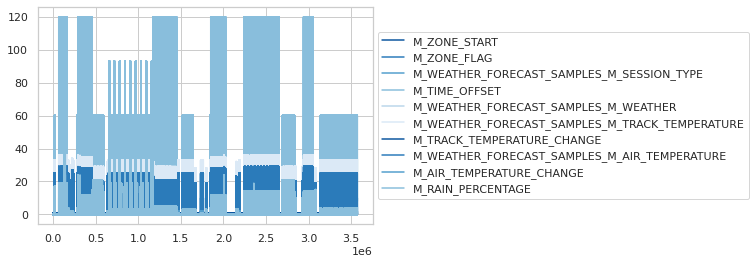

In [5]:
# sns.distplot(df[col_5], kde=False, norm_hist=True, bins=100)

ax = df[['M_ZONE_START', 'M_ZONE_FLAG','M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 
         'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 
         'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE']].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
# sns.lineplot(x="M_ZONE_START", y="M_WEATHER", data=df)

In [155]:
for i in col_2:
    (df[i].value_counts())


0.0    2764377
1.0     807950
Name: M_NETWORK_GAME, dtype: int64
200.0    2956250
53.0      273658
5.0       232078
33.0      101024
57.0        2926
66.0        2849
63.0        2772
28.0         770
Name: M_TOTAL_LAPS, dtype: int64
0.0    3007763
1.0     564564
Name: M_STEERING_ASSIST, dtype: int64
0.0    3567014
1.0       5313
Name: M_IS_SPECTATING, dtype: int64
0.0    2445663
2.0    1126664
Name: M_DYNAMIC_RACING_LINE, dtype: int64
0.0    2445663
1.0    1126664
Name: M_DRSASSIST, dtype: int64
16.0    1474924
17.0    1095248
18.0     693924
19.0     263417
14.0      19404
10.0      15708
13.0       9702
Name: M_NUM_MARSHAL_ZONES, dtype: int64


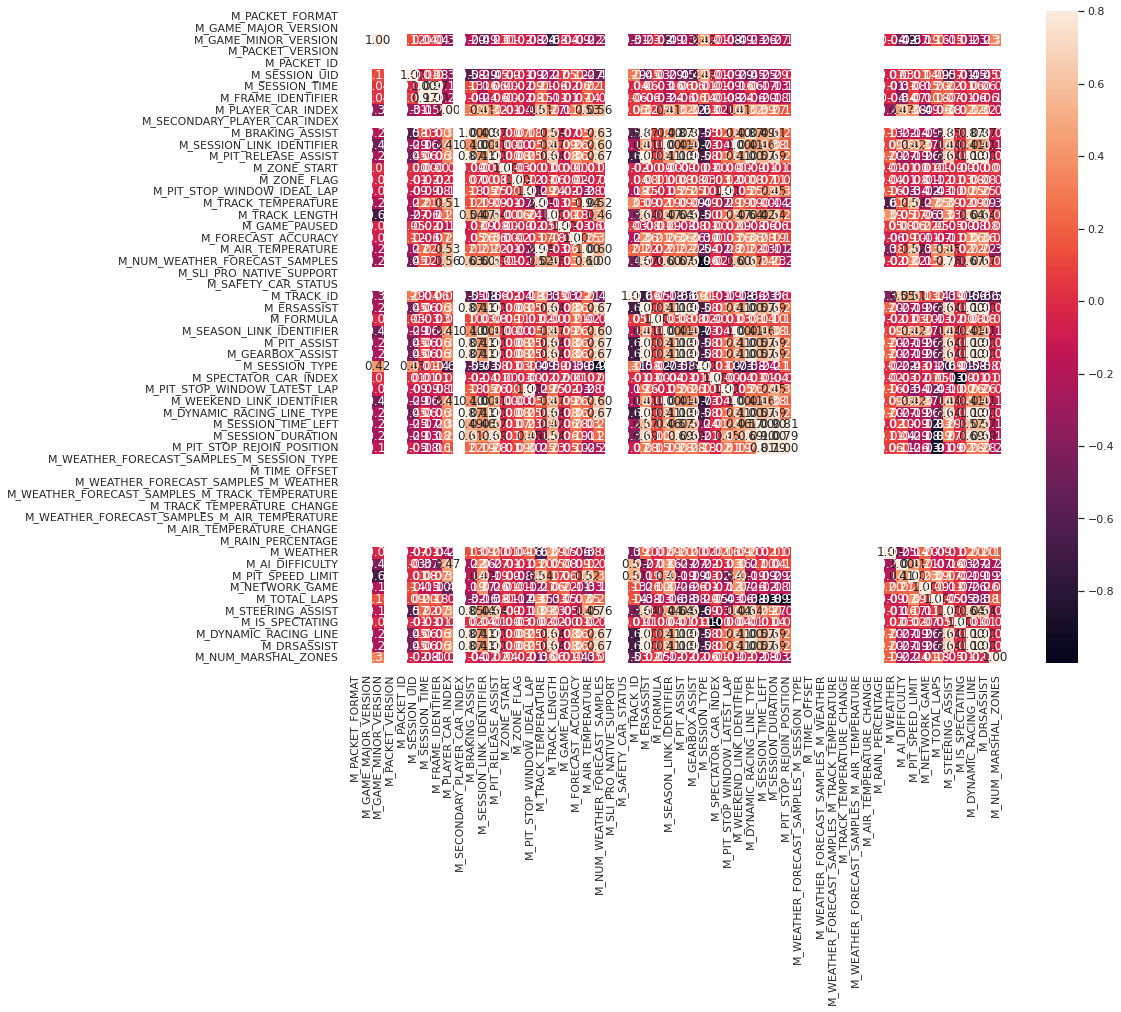

In [108]:
corrmat = dh.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

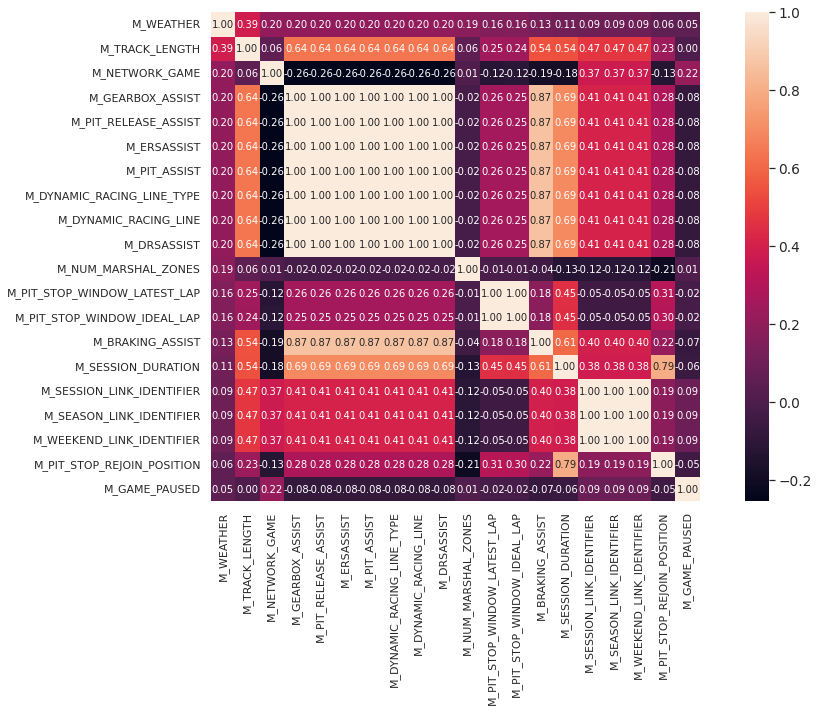

In [109]:
# top 25 most correlated features with Weather (correlation matrix) 

f, ax = plt.subplots(figsize=(16, 9))
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(dh[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

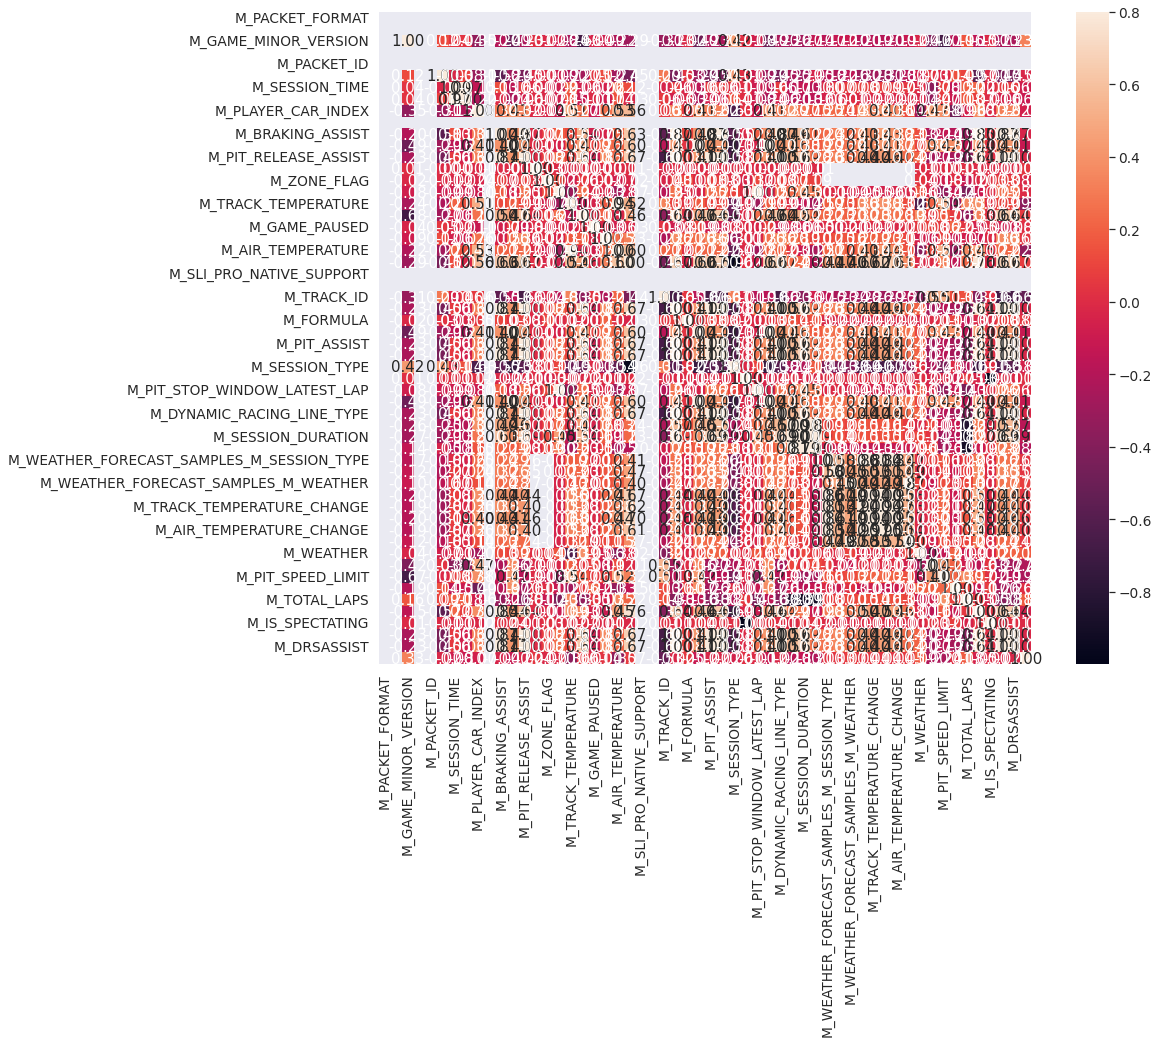

In [110]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

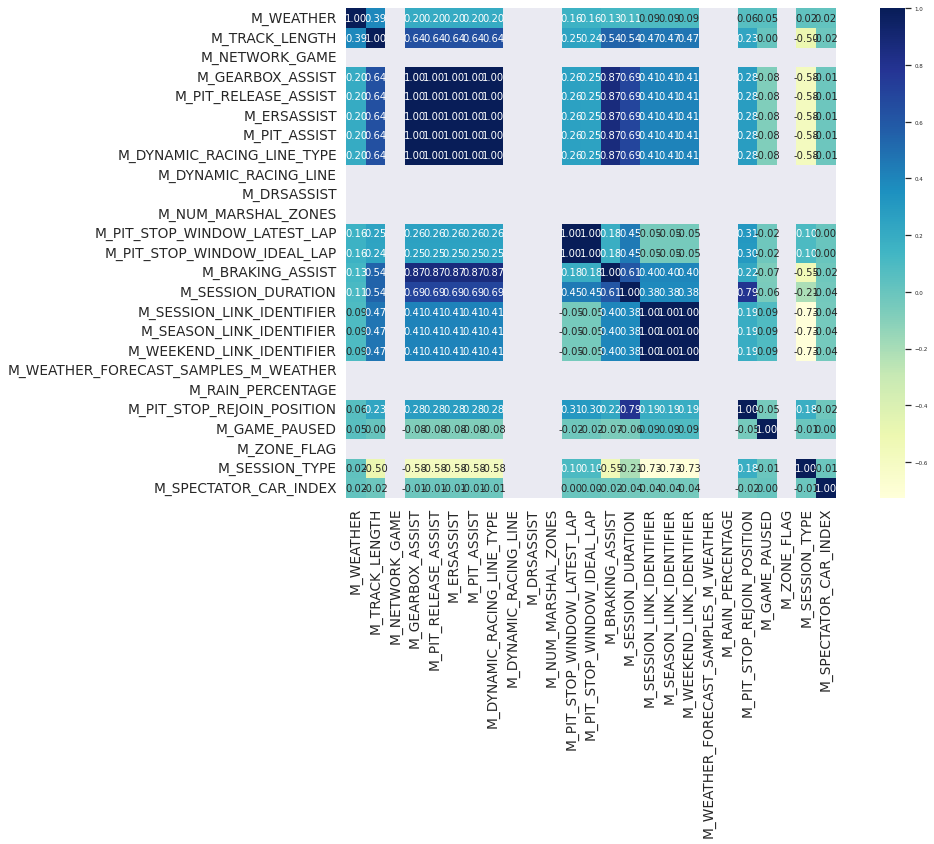

In [111]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(16, 9))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(df[cols].values.T)

sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f',
                 cmap='YlGnBu', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

## A second peep at some of the interesting Features

In [137]:
# lets create columns of interest
col_1 = ['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 
         'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 
         'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE']

col_2 = ['M_NETWORK_GAME', 'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES']

col_3 = ['M_ZONE_START', 'M_ZONE_FLAG']

col_4 = ['M_WEEKEND_LINK_IDENTIFIER', 'M_SEASON_LINK_IDENTIFIER', 'M_SESSION_LINK_IDENTIFIER', 'M_SESSION_UID']
interest_col = [col_1, col_2, col_3, col_4]

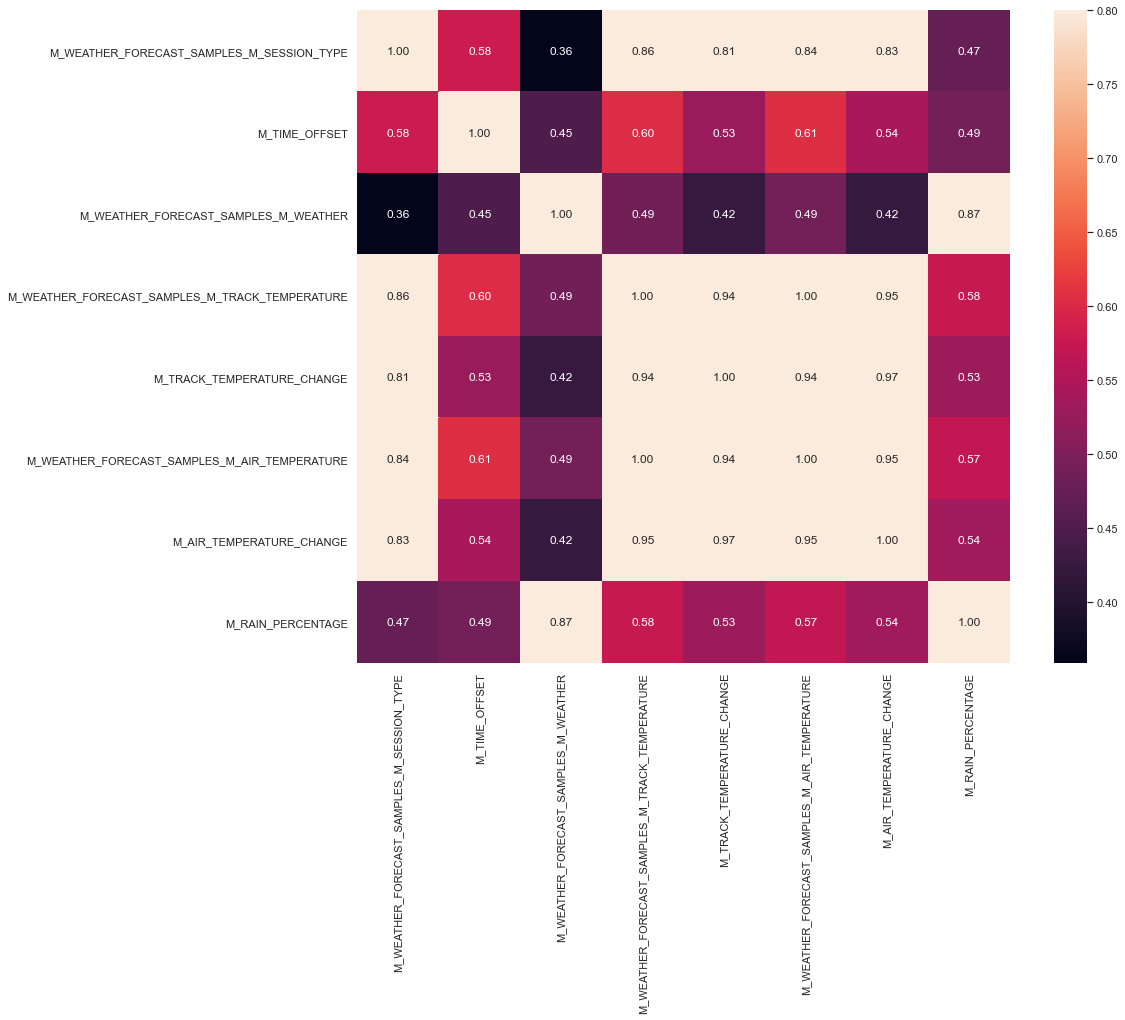

In [25]:
corrmat = df[col_1].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');


As expected, 

1) forcasted track temprature is so perfectly correlated with the forcasted air Temprature, 

2) forcasted track temprature changes is so well correlated with the air Temprature changes, and in turn related to the temps themself, i.e the changes are not so far from original, during the time stamp 

3) The session type is so related to the forcasted weather condition, hence, a good predictor to note.


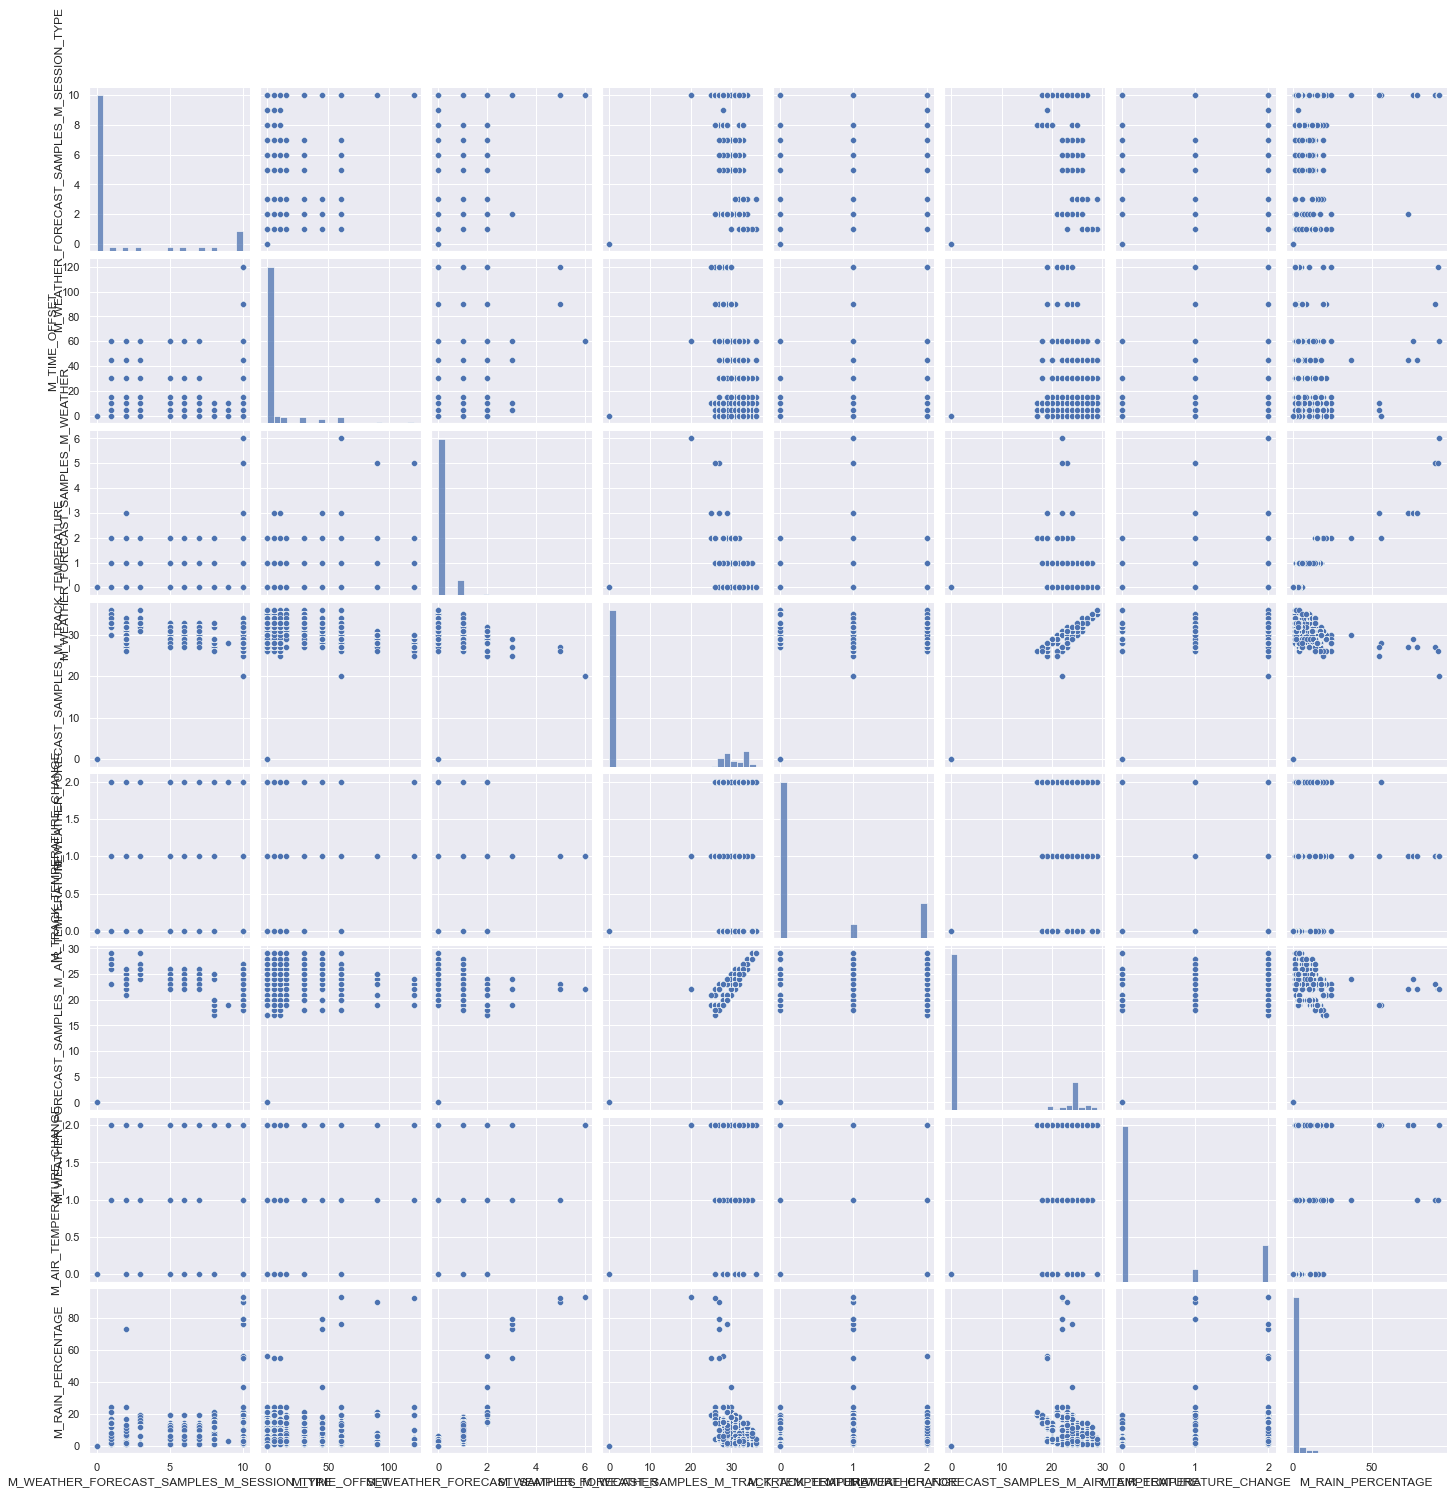

In [33]:
#scatterplot
sns.set()
sns.pairplot(df[col_1], size = 2.5)
plt.show();

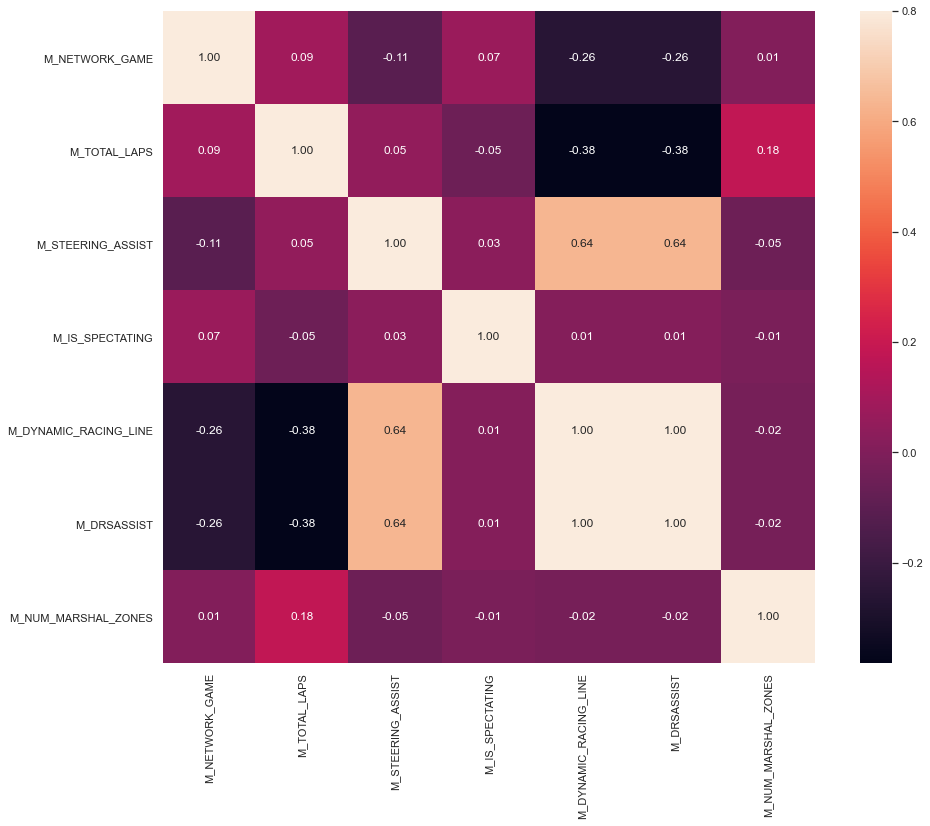

In [26]:
corrmat = df[col_2].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

Whilst the correlation here is a little low, sweet spot of interest is in DRS_Assist and Dynamic Racing Line

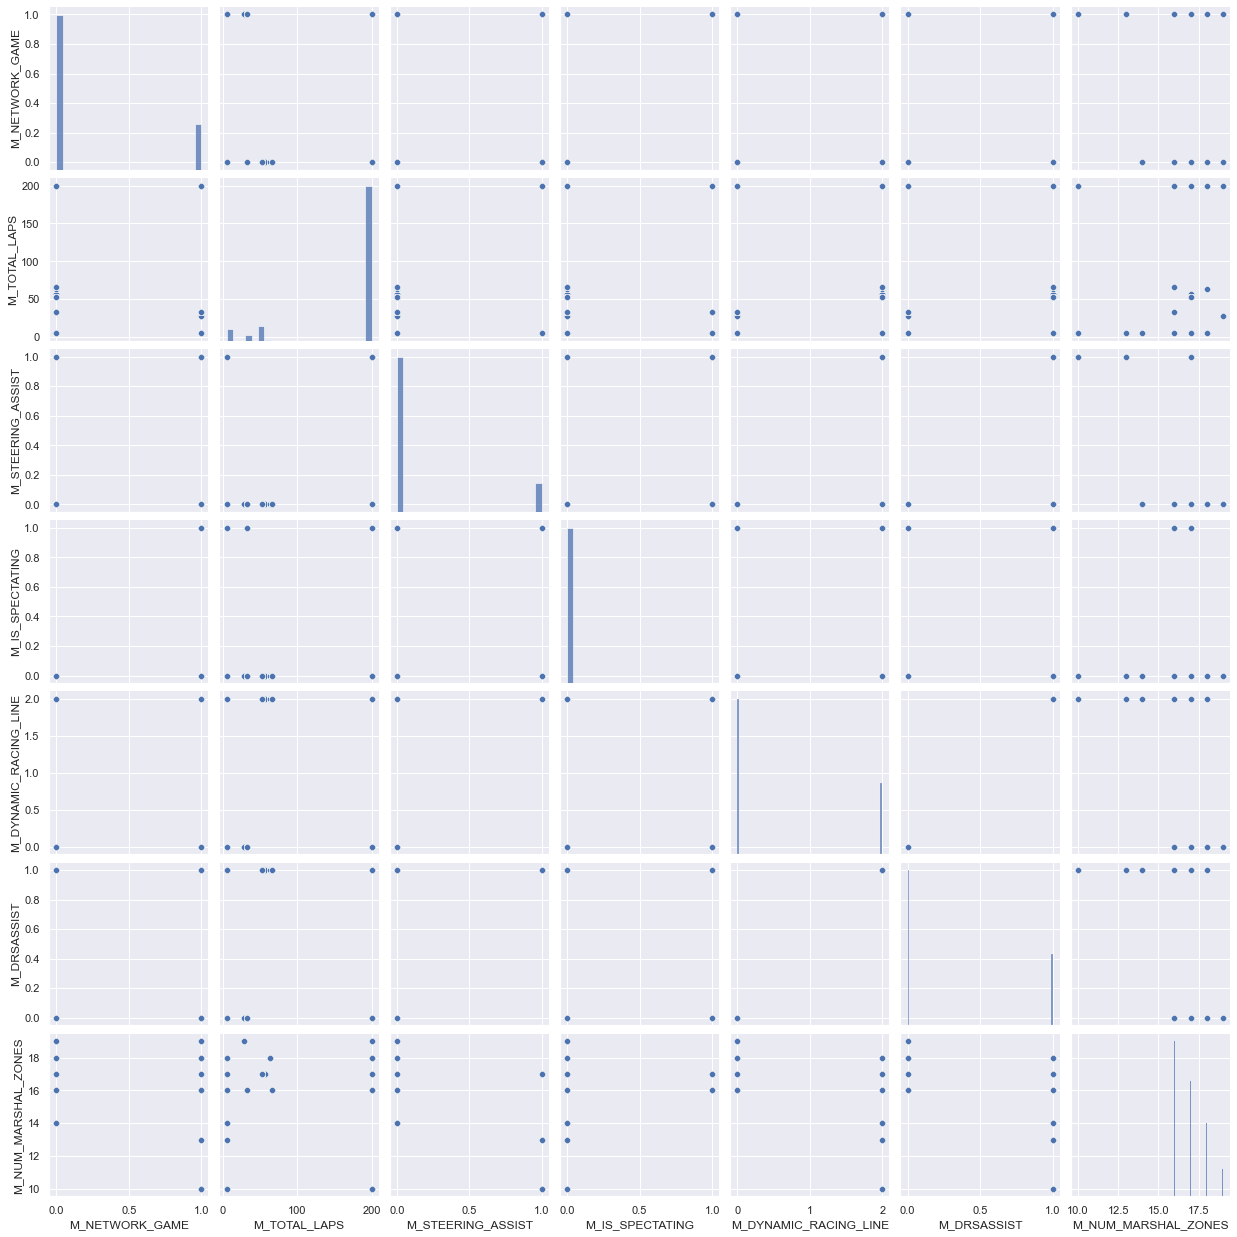

In [37]:
#scatterplot
sns.set()
sns.pairplot(df[col_2], size = 2.5)
plt.show();

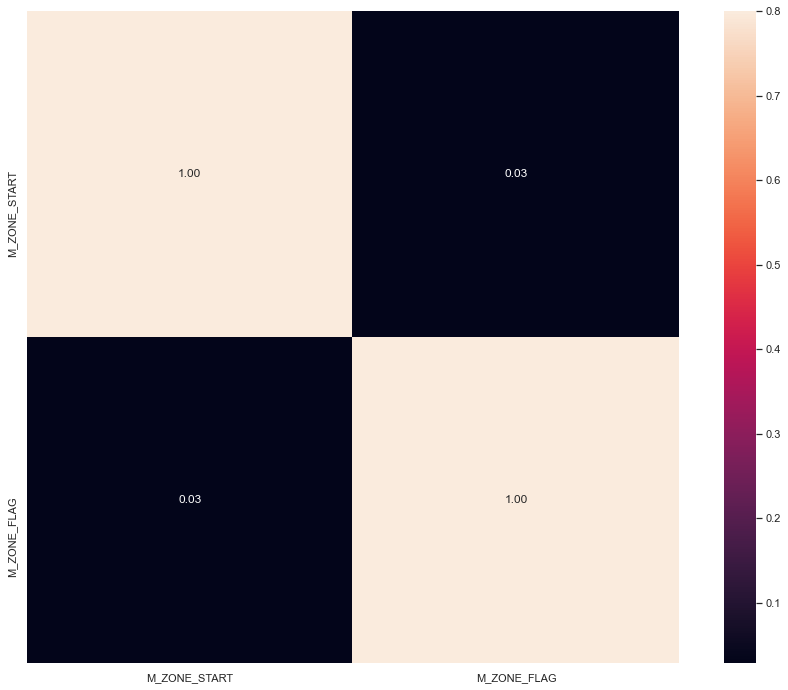

In [27]:
corrmat = df[col_3].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

opps... Not so much

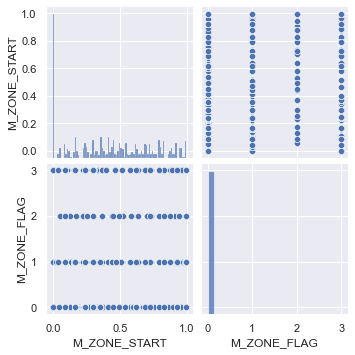

In [38]:
#scatterplot
sns.set()
sns.pairplot(df[col_3], size = 2.5)
plt.show();

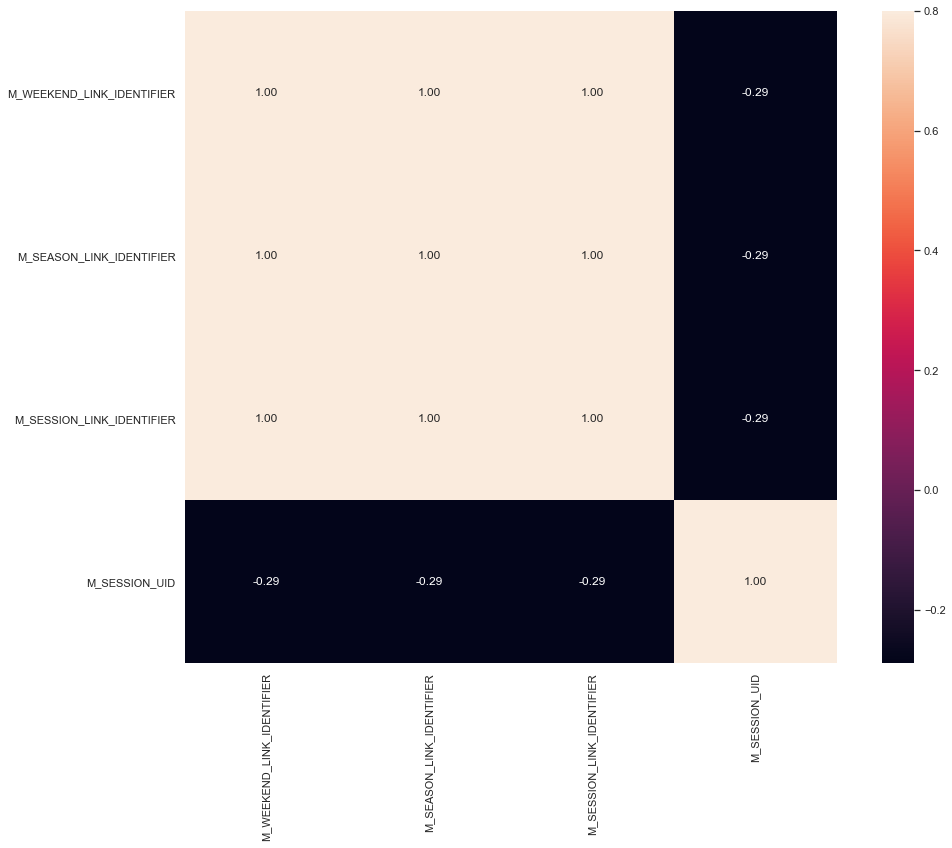

In [35]:
corrmat = df[col_4].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

Again, as anticipated, so we will just use 1 of the 3 features as representative of others

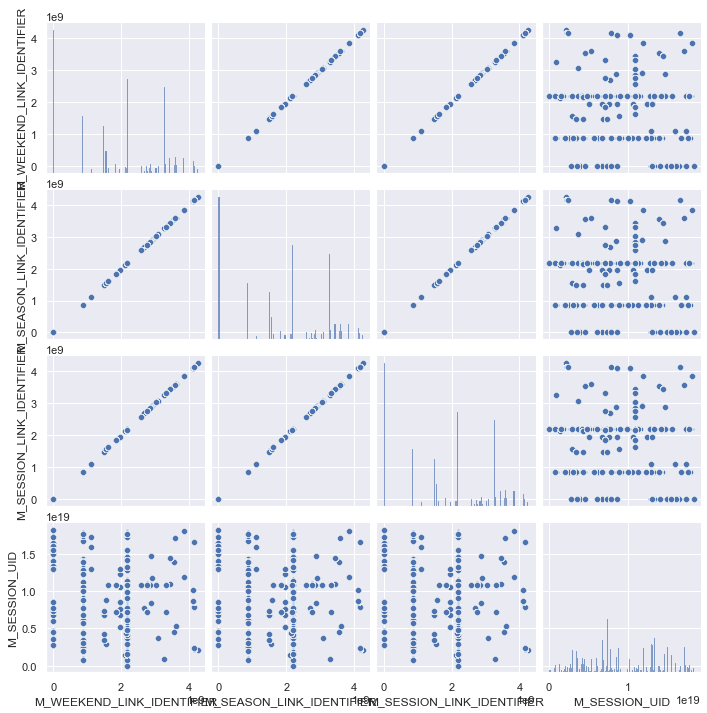

In [75]:
#scatterplot
sns.set()
sns.pairplot(df[col_4], size = 2.5)
plt.show();

## Now Lets take a wholistic view of the data

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# top 25 most correlated features with Weather (correlation matrix) 

f, ax = plt.subplots(figsize=(16, 9))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# top 25 most correlated features with % rainfall (correlation matrix)

f, ax = plt.subplots(figsize=(16, 9))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_RAIN_PERCENTAGE')['M_RAIN_PERCENTAGE'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Now let us take a deeper dive into the target Variables

In [67]:
df['M_WEATHER'].describe()

count    3.572328e+06
mean     3.304962e-01
std      7.195647e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.000000e+00
Name: M_WEATHER, dtype: float64

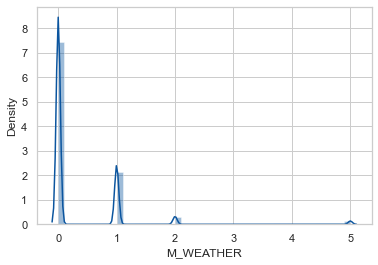

In [65]:
# Lets see the weather plot
sns.distplot(df['M_WEATHER']);

In [69]:
# Seems there is no value for 3 and 4
df['M_WEATHER'].value_counts()

0    2664421
1     763609
2     101486
5      42812
Name: M_WEATHER, dtype: int64

As expected, there are no record for light and heavy rainfall

In [70]:
df['M_RAIN_PERCENTAGE'].describe()

count    2.598054e+06
mean     1.147212e+00
std      3.353760e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.300000e+01
Name: M_RAIN_PERCENTAGE, dtype: float64

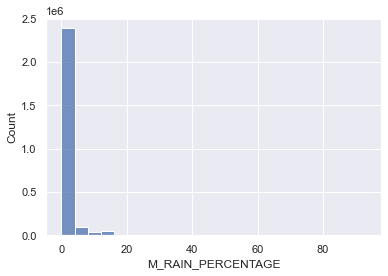

In [76]:
# Lets see the weather plot
sns.histplot(df['M_RAIN_PERCENTAGE']);

In [71]:
With this kind of visuals, we might need some normalization, lets take a closer look
df['M_RAIN_PERCENTAGE'].value_counts()

0.0     1953651
1.0      196196
3.0       94250
2.0       77153
4.0       70709
6.0       50614
14.0      32823
5.0       23234
7.0       16791
11.0      13667
13.0      12217
10.0      12133
8.0       10168
9.0        9837
12.0       7795
18.0       4522
15.0       3531
21.0       2151
19.0       2017
16.0       1916
17.0        862
93.0        486
79.0        486
20.0        399
24.0        195
55.0        156
56.0         78
73.0          9
90.0          2
37.0          2
76.0          2
92.0          2
Name: M_RAIN_PERCENTAGE, dtype: int64

In [74]:
df[df['M_RAIN_PERCENTAGE']<10].M_RAIN_PERCENTAGE.count()/df.M_RAIN_PERCENTAGE.count()*100

96.32605788794228

In [ ]:
So more than 96% of the target entries falls in the first 10 percentals

## Now Lets look into Features with missing values and how to fill them up

In [167]:
drop_col = []
for col in df.columns:
    if df[col].nunique()<2:
        drop_col.append(col)
print(drop_col)

['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SECONDARY_PLAYER_CAR_INDEX', 'M_SLI_PRO_NATIVE_SUPPORT', 'M_SAFETY_CAR_STATUS']


In [168]:
for col in df.columns:
    if df[col].isnull().sum() > 0.3*df.shape[0]:
        drop_col.append(col)
print(drop_col)

['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SECONDARY_PLAYER_CAR_INDEX', 'M_SLI_PRO_NATIVE_SUPPORT', 'M_SAFETY_CAR_STATUS', 'M_ZONE_START', 'M_ZONE_FLAG']


In [165]:
drop_row =[]
for col in df.columns:
    if df[col].isnull().sum() == 974274:
        drop_row.append(col)
print(drop_row)

['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE']


In [174]:
fill_col = []
for col in df.columns:
    if df[col].isnull().sum() in range(1, int(0.01*df.shape[0])):
        fill_col.append(col)
print(fill_col)

['M_NETWORK_GAME', 'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES']


In [172]:
df[col].isnull().sum()

0

In [162]:
for col in df.columns:
    if (df[col].isnull().sum() > 1 and f[col].isnull().sum() < 1000000:
        drop_col.append(col)
drop_col.append()

255    3572328
Name: M_SECONDARY_PLAYER_CAR_INDEX, dtype: int64

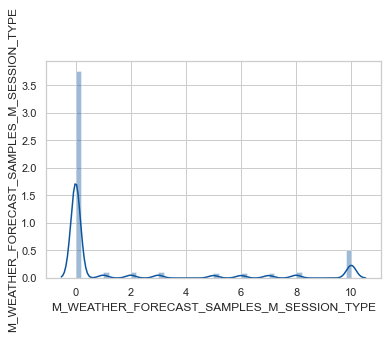

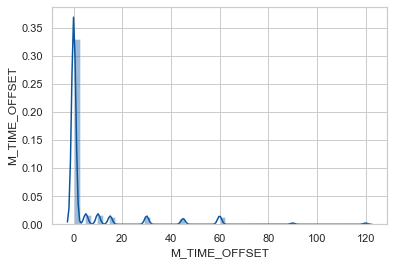

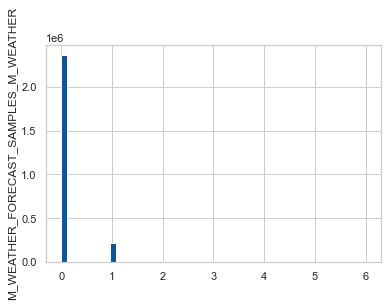

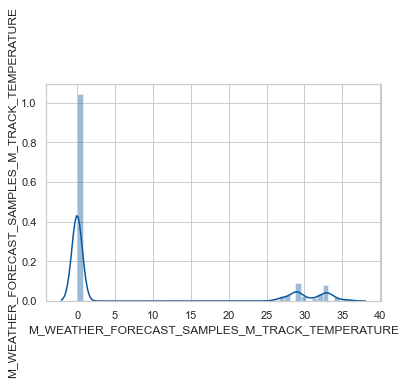

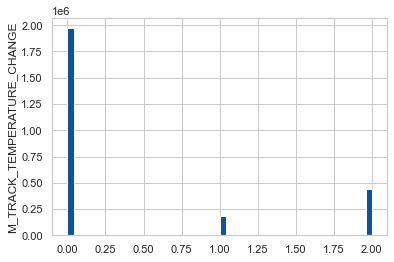

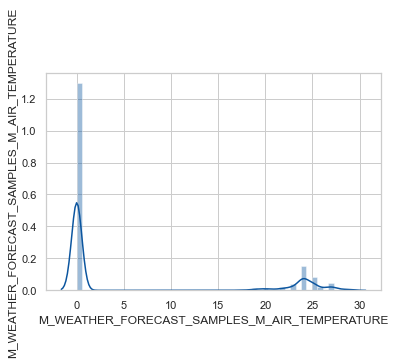

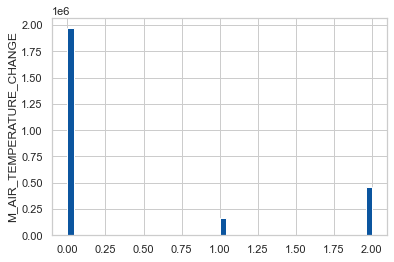

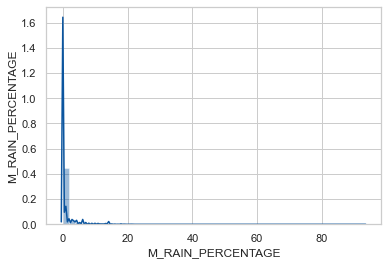

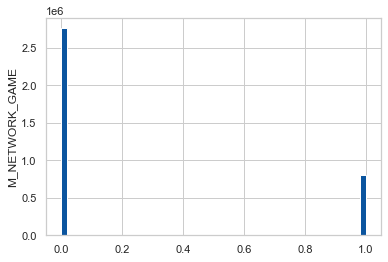

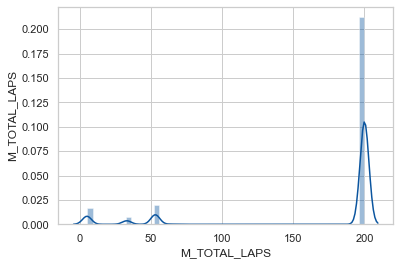

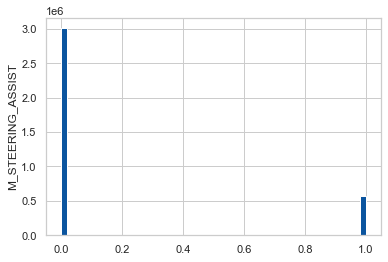

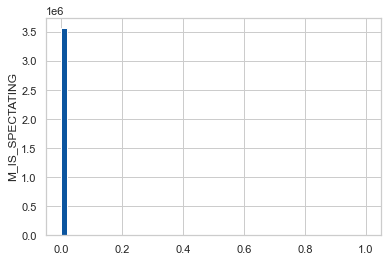

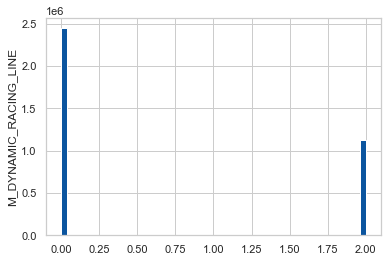

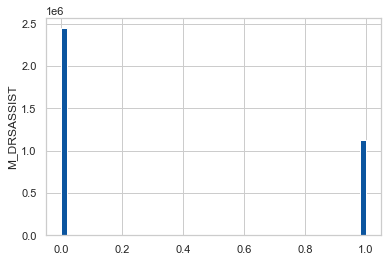

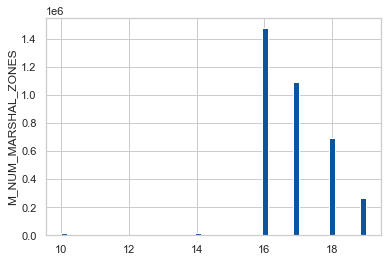

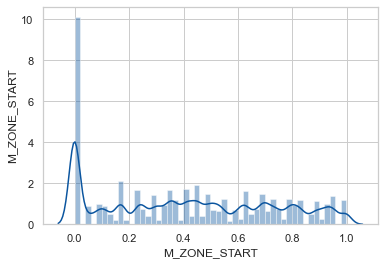

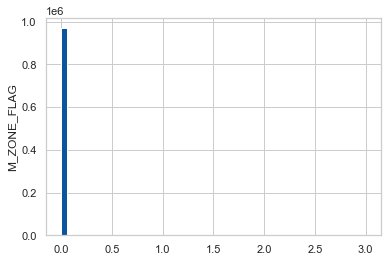

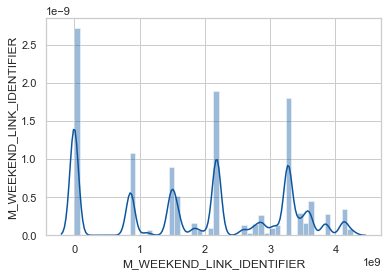

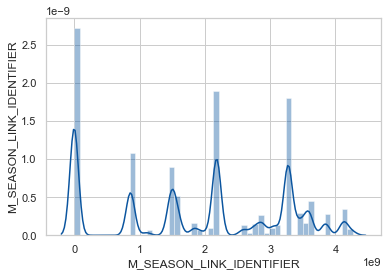

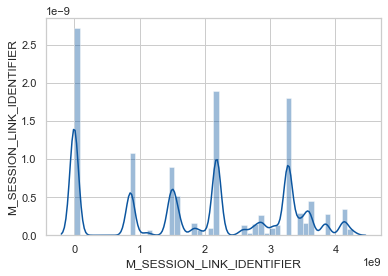

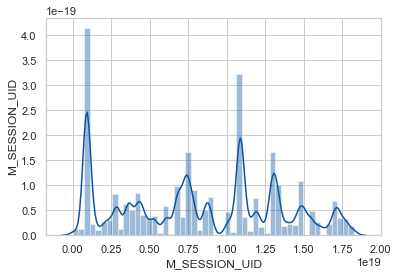

In [63]:
for array in interest_col:
    for feature in array:
        if df[feature].nunique()> 7:
            sns.distplot(df[feature], bins=50, hist_kws={'alpha': 0.4})
        else:
            plt.hist(df[feature], bins=50, label=feature)
        plt.ylabel(feature)
        plt.show()

In [ ]:
Seems we might need to Normalise before filling the missing values

## Now Lets look at the visuals for the data set and its relationship with the target

In [81]:
df_corr = df.corr()['M_WEATHER'][:] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Weather:\n{}".format(len(golden_features_list), golden_features_list))


There is 2 strongly correlated values with Weather:
M_WEATHER              1.000000
M_TRACK_TEMPERATURE   -0.614053
Name: M_WEATHER, dtype: float64


In [ ]:
df_corr = df.corr()['M_RAIN_PERCENTAGE'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Weather:\n{}".format(len(golden_features_list), golden_features_list))


## Now lets look out for outliers